## Install Packages

In [3]:
%pip install pandas numpy scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib plotly seaborn

Note: you may need to restart the kernel to use updated packages.


## Importing Packages

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/var/folders/kj/lxfx5ktx5fzdl5w_3ty2z5m00000gn/T/ipykernel_34821/4166404829.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Training Data EDA

In [6]:
train_data_df = pd.read_csv("./data/Train.csv")

In [7]:
test_data_df = pd.read_csv("./data/Test.csv")

In [8]:
train_data_df.shape

(355311, 21)

In [9]:
train_data_df.head()

,Sale,Quote,Segment,Order_Dt,Arrive_by_dt,Brand,Product,Ship_City,Ship_state,Paym_term,...,Qty,order_amt,deliver_dt,prvlg_ship_mode,prvlg_build_fac,prvlg_ship_fac,prvlg_in_prod_dt,prvlg_ship_dt,prvlg_expected_delivery_dt,prvlg_updated_delivery_dt
0,937906663.0,NaN,c3976246348c686e4deca0a7e331a039,3/24/2019,NaN,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,62eb42063b4c63d18f476e5c92eafa50,2384e716112fd9418cbb48957c45bfc5,652f6b0c37563fb728f0560faac1c036,...,10,8448.009347,4/19/2019,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,334dfb1ef5fc623374b835e11383d8a0,4/4/2019,4/9/2019,5/12/2019,4/9/2019
1,821969174.0,1.017820e+12,d8856a306e76cdec5c33ddb4195c185d,10/12/2018,NaN,f7127745295f48bdf8fe7a38516d6d41,8fefe421a574b35a71a59d7334dc9d77,ecfc435e2f1b34807f368797625785a6,40871108ac50c36ac78ef67273d247e8,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,...,1,1115.066911,10/22/2018,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,334dfb1ef5fc623374b835e11383d8a0,10/15/2018,10/21/2018,11/4/2018,10/21/2018
2,917089389.0,3.000090e+12,c3976246348c686e4deca0a7e331a039,2/23/2019,NaN,7d2d85b3d683840d2b6ca6eb2ca1ba0c,2ce9e0196a21cf2045c0bec59f692a5f,e0975410aeac093508e12d41f3a2bd44,2384e716112fd9418cbb48957c45bfc5,3da37128be279acdc5f6843977bdaec6,...,2,1142.849799,3/28/2019,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,334dfb1ef5fc623374b835e11383d8a0,3/21/2019,3/25/2019,4/14/2019,3/29/2019
3,904932797.0,1.029690e+12,62ec0553902c09a0651064e81375217d,2/5/2019,NaN,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,8de35dfb7f96b0c4228dd9bfe4abf7aa,2384e716112fd9418cbb48957c45bfc5,19c7bb068de1fdffcb13cd2691e6088a,...,1,1574.382299,3/1/2019,8c99a6e96b1e636675d6d71eeabd5938,334dfb1ef5fc623374b835e11383d8a0,82f1724d93a668a5800a91973e3115f2,2/12/2019,2/25/2019,3/26/2019,2/25/2019
4,886146272.0,3.000080e+12,79238f4ec268203867a0d6847b3c2846,1/8/2019,NaN,68648ccd3ba6a5cb996019622a58c56e,5400e26de9b23978b8907afdcd0bcb97,b956dc64ac02f753e7549bbc660c74de,89bc8c0c87b49d3bb6f8fdb4b9bae4b0,3da37128be279acdc5f6843977bdaec6,...,2,1285.218528,4/26/2019,57dcf6017ed4410f481220ec1e135c81,c9f6ff0d507cbe7ca0ea07e4c88a1880,c9f6ff0d507cbe7ca0ea07e4c88a1880,4/9/2019,4/18/2019,3/23/2019,4/20/2019


In [10]:
train_data_df.isna().sum()/ train_data_df.shape[0] * 100

Sale                           0.000000
Quote                         14.227254
Segment                        0.000000
Order_Dt                       0.000000
Arrive_by_dt                  99.130339
Brand                          0.000000
Product                        0.000000
Ship_City                      0.000000
Ship_state                     0.000000
Paym_term                      0.000000
sku_lead_tm                    4.939898
Qty                            0.000000
order_amt                      0.000000
deliver_dt                     0.000000
prvlg_ship_mode                0.000000
prvlg_build_fac                0.000000
prvlg_ship_fac                 0.000000
prvlg_in_prod_dt               0.003096
prvlg_ship_dt                  0.022234
prvlg_expected_delivery_dt     0.000000
prvlg_updated_delivery_dt      4.432455
dtype: float64

## Dropping Arrive_by_dt column because of 99% null values

In [11]:
train_data_df.drop(columns=["Arrive_by_dt"], inplace=True)

In [12]:
train_data_df.dtypes

Sale                          float64
Quote                         float64
Segment                        object
Order_Dt                       object
Brand                          object
Product                        object
Ship_City                      object
Ship_state                     object
Paym_term                      object
sku_lead_tm                   float64
Qty                             int64
order_amt                     float64
deliver_dt                     object
prvlg_ship_mode                object
prvlg_build_fac                object
prvlg_ship_fac                 object
prvlg_in_prod_dt               object
prvlg_ship_dt                  object
prvlg_expected_delivery_dt     object
prvlg_updated_delivery_dt      object
dtype: object

In [13]:
prvlg_info_cols = [col for col in train_data_df.columns if "prvlg" in col]

In [14]:
len(prvlg_info_cols)

7

In [15]:
non_prvlg_info_cols = set(train_data_df.columns) - set(prvlg_info_cols)

In [16]:
len(non_prvlg_info_cols)

13

## There are total 7 Privileged Columns and 14 Non-Privileged Columns

## Build and Ship Facilities Analysis

In [17]:
build_fac = set(train_data_df["prvlg_build_fac"].unique())
ship_fac = set(train_data_df["prvlg_ship_fac"].unique())

In [18]:
len(build_fac)

7

In [19]:
len(ship_fac)

8

In [20]:
build_fac.intersection(ship_fac)

{'334dfb1ef5fc623374b835e11383d8a0',
 '454a2ff79c3fff8327628dcc4b724f9a',
 'ad8ea24b78598a945973ce7e2f0e7f93',
 'b249c002fd5910a8e608ffc14dd9e4d3',
 'c9f6ff0d507cbe7ca0ea07e4c88a1880'}

In [21]:
len(build_fac.intersection(ship_fac))

5

## There are total 7 Build Facilites and 8 Ship Facilities, out of 5 are common

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le_prvlg_build_ship_fac = LabelEncoder()
le_prvlg_build_ship_fac.fit(train_data_df[["prvlg_build_fac", "prvlg_ship_fac"]].values.reshape(-1, 1))

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [24]:
train_data_df["prvlg_build_fac"] = le_prvlg_build_ship_fac.transform(train_data_df["prvlg_build_fac"])

In [25]:
train_data_df["prvlg_ship_fac"] = le_prvlg_build_ship_fac.transform(train_data_df["prvlg_ship_fac"])

In [26]:
build_orders = train_data_df.groupby("prvlg_build_fac").size().reset_index(name="Orders Fullfilled")

In [27]:
build_orders

,prvlg_build_fac,Orders Fullfilled
0,0,220464
1,2,695
2,4,14208
3,6,15345
4,7,119
5,8,18102
6,9,86378


In [28]:
build_orders["Orders Fullfilled"] = build_orders["Orders Fullfilled"] / train_data_df.shape[0] * 100

In [29]:
build_orders

,prvlg_build_fac,Orders Fullfilled
0,0,62.048178
1,2,0.195603
2,4,3.998750
3,6,4.318752
4,7,0.033492
5,8,5.094692
6,9,24.310534


## Build Facility 0 and 9 and build the bulk of orders 62.04% and 24.3% respectively

In [30]:
ship_orders = train_data_df.groupby(["prvlg_ship_fac"]).size().reset_index(name="Orders Fullfilled")

In [31]:
ship_orders["Orders Fullfilled"] = ship_orders["Orders Fullfilled"] / train_data_df.shape[0] * 100

In [32]:
ship_orders

,prvlg_ship_fac,Orders Fullfilled
0,0,49.749937
1,1,1.950123
2,2,0.195603
3,3,1.706674
4,5,11.424076
5,7,2.298550
6,8,11.207365
7,9,21.467672


## Majority of the orders are fullfilled by Ship Facility 0 and 9 (Same as Build Facility) 49.7% and 21.4% respectively

In [33]:
build_ship_orders = train_data_df.groupby(["prvlg_build_fac", "prvlg_ship_fac"]).size().reset_index(name = "Orders Fullfilled")

In [34]:
build_ship_orders["Orders Fullfilled"] = build_ship_orders["Orders Fullfilled"] / train_data_df.shape[0] * 100

In [35]:
build_ship_orders

,prvlg_build_fac,prvlg_ship_fac,Orders Fullfilled
0,0,0,49.749937
1,0,1,0.925949
2,0,3,1.356840
3,0,5,5.329134
4,0,7,1.014041
5,0,8,3.672276
6,2,2,0.195603
7,4,1,0.229939
8,4,5,1.401308
9,4,7,0.956908


## There are total 22 Unique Build Facility and Ship Facility Pairs

## Build Facility 2, 7 and 8, only ship from the same Facility

In [36]:
build_ship_orders["prvlg_build_fac"] = le_prvlg_build_ship_fac.inverse_transform(build_ship_orders["prvlg_build_fac"])
build_ship_orders["prvlg_ship_fac"] = le_prvlg_build_ship_fac.inverse_transform(build_ship_orders["prvlg_ship_fac"])


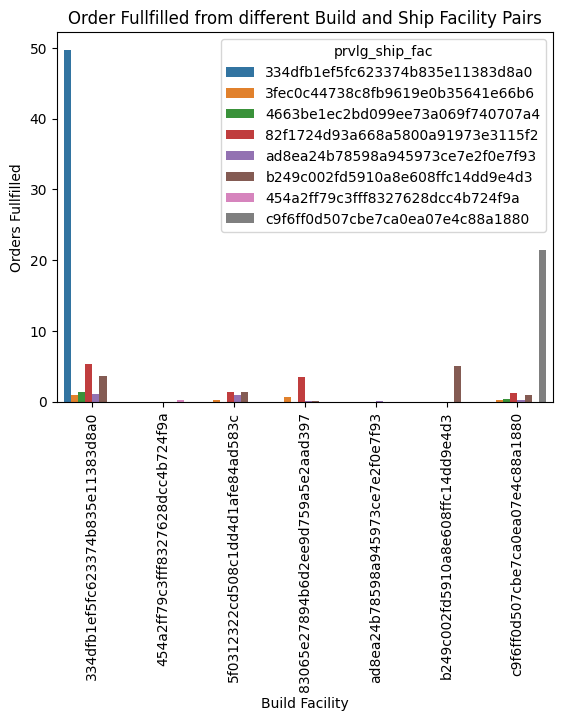

In [37]:
sns.barplot(data=build_ship_orders, x="prvlg_build_fac", hue="prvlg_ship_fac", y="Orders Fullfilled",
             )
plt.title('Order Fullfilled from different Build and Ship Facility Pairs')
plt.xlabel('Build Facility')
plt.ylabel('Orders Fullfilled')
plt.xticks(rotation=90)


# Show the plot
plt.show()

In [38]:
fig = px.bar(build_ship_orders, x='prvlg_build_fac', y='Orders Fullfilled', color='prvlg_ship_fac')

# Customize the plot
fig.update_layout(title='Percentage of Orders Fullfilled by Build Facilities', title_x=0.2, title_y=0.9)
fig.update_xaxes(title='Build Facility')
fig.update_yaxes(title='Orders Fullfilled Percentage')

# # Show the plot
fig.show()

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Ship City and Ship State Analysis

In [39]:
train_data_df['Ship_City'].value_counts()/ train_data_df.shape[0] * 100

Ship_City
62eb42063b4c63d18f476e5c92eafa50    2.259429
3e19b398ac7cad67fa3758a0d3edb4d7    1.419039
2e3414e03c2cd73f90042067ad761177    1.191914
693603f1e06d1bb780c9267d128d4d91    1.127463
1af6381a527dc578a3eab65900c7f5cf    0.980831
                                      ...   
6c86921b4a26f54d449988d2ee272e5f    0.000281
49b3c81b7d9b01d35142779a1b11a56d    0.000281
14ba36e16504c9324af6d40275509b4c    0.000281
423104529c8e3b359a788a6dff5cadc7    0.000281
284a3bb08db1990a765b30a188f49da4    0.000281
Name: count, Length: 8650, dtype: float64

In [40]:
train_data_df["Ship_City"].nunique()

8650

In [41]:
train_data_df["Ship_state"].nunique()

53

## There are total 8560 unique Ship Cities and 53 unique Ship States

In [42]:
train_data_df["Ship_state"].value_counts() / train_data_df.shape[0] * 100

Ship_state
2384e716112fd9418cbb48957c45bfc5    10.189946
2bedd54d48692762c119b27f5ec7a320     8.533932
b6d500562c649a998644ed4a6e4cc763     5.608889
2f88e16c4f21bfcb290b2a8288c05bd0     4.835482
51e1bad2966e40e0982aaafd5e48a884     4.806212
d599245d7d7e3f56863ba3a6112ca71b     4.138065
00b3f73da0305924e18c2da44c404317     3.811872
1b057d480ff947253d12ab56e8a898de     3.570675
1689806923c5ca6be9927d94f5083ebb     3.480050
0f3ceeca0d7a5e8bf871250a19299d01     3.332011
f145ee7da5e4e5abfc6cdbb6b20cdbc3     3.291764
48de638d851bf60f8e1ecb4d26764c70     3.284165
fc5677661dac522d680afd24d29637b5     3.065202
c2213911d3492ede641be03d5757b211     2.710865
e336d1d731c5648c3285be5f393e7a28     2.649228
4b767422a6fa6420c6626d50d3bcbad6     2.611515
66bed72017b7ef1665f94a64eb8907bf     2.592658
353dde353f843364ce13d41c52b06a54     2.011196
51781a12f1a03484cb2455108a9740db     2.008663
be5db867a84dfe5d4a344c97a6798cc2     1.892427
66118b06068697cdf0f3dbdca028d613     1.837545
40871108ac50c36ac78ef67

In [43]:
common_cities_states = set(train_data_df["Ship_state"].unique()).intersection(set(train_data_df["Ship_City"].unique()))

In [44]:
train_data_df[(train_data_df["Ship_City"] == '2f88e16c4f21bfcb290b2a8288c05bd0') & (train_data_df["Ship_state"] == '2f88e16c4f21bfcb290b2a8288c05bd0')].shape

(63, 20)

In [45]:
common_cities_states_data = train_data_df[(train_data_df["Ship_City"].isin(common_cities_states)) & (train_data_df["Ship_state"].isin(common_cities_states))]

In [46]:
common_cities_states_data

,Sale,Quote,Segment,Order_Dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,order_amt,deliver_dt,prvlg_ship_mode,prvlg_build_fac,prvlg_ship_fac,prvlg_in_prod_dt,prvlg_ship_dt,prvlg_expected_delivery_dt,prvlg_updated_delivery_dt
6055,812931103.0,3.000080e+12,79238f4ec268203867a0d6847b3c2846,9/29/2018,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,c46b25b7686702d6ecf8976a1554c3be,0.0,1,150.935078,10/16/2018,8c99a6e96b1e636675d6d71eeabd5938,0,5,10/6/2018,10/13/2018,10/14/2018,10/16/2018
7723,817546958.0,NaN,4f8f76dfe9030964584b50fefc1d3edb,10/6/2018,dcf2bd50991601224d4419843bccfcf7,26a2f8a730ad2d4ae4504c893ed2314f,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,3da37128be279acdc5f6843977bdaec6,35.0,1,1790.884351,11/18/2018,8c99a6e96b1e636675d6d71eeabd5938,0,0,11/3/2018,11/16/2018,12/16/2018,11/18/2018
17595,810161705.0,3.000080e+12,d4d4102d1671f635c274ea64ee263571,9/24/2018,f1e132c9790a3e39778e0a6c7da491b7,898a7c83f45344b9ffd3c67410f48d58,5b58e040ee35f3bcc6023fb7836c842e,5b58e040ee35f3bcc6023fb7836c842e,3da37128be279acdc5f6843977bdaec6,5.0,1,1540.479330,9/30/2018,8c99a6e96b1e636675d6d71eeabd5938,0,0,9/24/2018,9/28/2018,10/14/2018,9/30/2018
27486,806734549.0,NaN,436f49abaa9ead4944c0757c875ad7bd,9/20/2018,bf1e12efbdd0387f847b98128d6d54ec,7ab41b6ad9529149afd77011a95e78d9,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,240d30bc731e89ee278c0f3a833729a8,4.0,1,897.094946,9/30/2018,8c99a6e96b1e636675d6d71eeabd5938,9,9,9/21/2018,9/28/2018,10/12/2018,9/30/2018
33781,808548059.0,1.025530e+12,2089cf8b6194305d2c0df02faa5a1360,9/22/2018,b4ccd9fad99ab032db8ea2608af35dba,ad17e3eeab4bf4f42303ce64b3e04139,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,652f6b0c37563fb728f0560faac1c036,6.0,24,22529.912680,10/7/2018,8c99a6e96b1e636675d6d71eeabd5938,9,5,9/24/2018,9/28/2018,10/15/2018,10/5/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343086,813614457.0,3.000080e+12,c3976246348c686e4deca0a7e331a039,9/30/2018,18d185368b49a4c24f4c1d37abfb2d0e,6ff93d89ec32485f02bf60ea1958b292,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,c46b25b7686702d6ecf8976a1554c3be,7.0,1,199.513424,10/12/2018,8c99a6e96b1e636675d6d71eeabd5938,0,0,9/30/2018,10/7/2018,10/28/2018,10/9/2018
343828,812566649.0,NaN,436f49abaa9ead4944c0757c875ad7bd,9/29/2018,c19dee52bf5eef3fd5095d9d08e03f44,269afd45f7c5e1b766c31ae9bd6dc290,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,240d30bc731e89ee278c0f3a833729a8,13.0,2,945.153349,10/12/2018,57dcf6017ed4410f481220ec1e135c81,9,9,10/3/2018,10/5/2018,10/28/2018,10/7/2018
346434,804081727.0,1.028470e+12,4f8f76dfe9030964584b50fefc1d3edb,10/1/2018,b8830500117e631cc308170495043a22,0b6275f9a2e9541f61a24be4775ba033,2f88e16c4f21bfcb290b2a8288c05bd0,2f88e16c4f21bfcb290b2a8288c05bd0,3da37128be279acdc5f6843977bdaec6,55.0,2,1297.996452,11/30/2018,8c99a6e96b1e636675d6d71eeabd5938,0,0,11/16/2018,11/25/2018,12/24/2018,11/30/2018
348879,943388272.0,3.000090e+12,79238f4ec268203867a0d6847b3c2846,3/31/2019,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,5b58e040ee35f3bcc6023fb7836c842e,5b58e040ee35f3bcc6023fb7836c842e,3da37128be279acdc5f6843977bdaec6,30.0,1,1749.628007,4/12/2019,8c99a6e96b1e636675d6d71eeabd5938,0,0,4/3/2019,4/9/2019,5/19/2019,4/12/2019


In [47]:
common_cities_states_data.shape

(72, 20)

In [48]:
common_cities_states_data[common_cities_states_data["Ship_City"] != common_cities_states_data["Ship_state"]].shape

(0, 20)

## There are 3 common Ship Cities and Ship States comprising of 72 Orders

## US has 50 states; Dropping the erroneous 3 common cities and states

In [49]:
train_data_df = train_data_df[~((train_data_df["Ship_City"].isin(common_cities_states)) & (train_data_df["Ship_state"].isin(common_cities_states)))]
train_data_df.reset_index(drop=True, inplace=True)

In [50]:
le_ship_city = LabelEncoder()

In [51]:
le_ship_city.fit(train_data_df[["Ship_City"]].values.reshape(-1, 1))

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LabelEncoder()

In [52]:
train_data_df["Ship_City"] = le_ship_city.transform(train_data_df["Ship_City"])

In [53]:
le_ship_state = LabelEncoder()

In [54]:
le_ship_state.fit(train_data_df[["Ship_state"]].values.reshape(-1, 1))

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LabelEncoder()

In [55]:
train_data_df["Ship_state"] = le_ship_state.transform(train_data_df["Ship_state"])

In [56]:
len(le_ship_state.classes_)

52

In [57]:
len(le_ship_city.classes_)

8647

In [58]:
ship_city_state_orders_data = train_data_df.groupby(["Ship_City", "Ship_state"]).size().reset_index(name="Orders Fullfilled")

In [59]:
ship_city_state_orders_data.shape

(12668, 3)

In [60]:
ship_city_state_orders_data

,Ship_City,Ship_state,Orders Fullfilled
0,0,0,462
1,0,12,7
2,0,20,17
3,0,46,2
4,1,31,3
...,...,...,...
12663,8643,20,1
12664,8643,22,11
12665,8644,12,5
12666,8645,6,1


In [61]:
ship_city_state_orders_data["Orders Fullfilled"] = ship_city_state_orders_data["Orders Fullfilled"] / train_data_df.shape[0] * 100

In [62]:
ship_city_state_orders_data

,Ship_City,Ship_state,Orders Fullfilled
0,0,0,0.130053
1,0,12,0.001971
2,0,20,0.004786
3,0,46,0.000563
4,1,31,0.000845
...,...,...,...
12663,8643,20,0.000282
12664,8643,22,0.003097
12665,8644,12,0.001408
12666,8645,6,0.000282


In [63]:
ship_city_state_orders_data.sort_values(by="Orders Fullfilled", ascending=False)

,Ship_City,Ship_state,Orders Fullfilled
4882,3366,8,2.245812
3053,2078,48,1.419326
2275,1561,40,1.186807
5204,3575,17,1.056472
1333,915,20,0.967799
...,...,...,...
9100,6243,12,0.000282
9097,6241,18,0.000282
646,437,31,0.000282
5299,3638,6,0.000282


In [64]:
len(le_ship_city.classes_)

8647

In [65]:
len(le_ship_state.classes_)

52

In [66]:
train_data_df.groupby(['Ship_state']).agg({'Ship_City': 'nunique'}).reset_index().sort_values(by="Ship_City", ascending=False)

,Ship_state,Ship_City
12,12,1404
40,40,712
10,10,709
8,8,677
7,7,642
37,37,506
20,20,501
0,0,478
6,6,447
35,35,424


In [67]:
ship_state_fac_data = train_data_df.groupby(["prvlg_ship_fac", "Ship_state"]).size().reset_index(name="Orders Fullfilled")

In [68]:
ship_state_fac_data["Orders Fullfilled"] = ship_state_fac_data["Orders Fullfilled"] / train_data_df.shape[0] * 100

In [69]:
ship_state_fac_data.sort_values(by="Orders Fullfilled", ascending=False)

,prvlg_ship_fac,Ship_state,Orders Fullfilled
8,0,8,5.415227
10,0,10,5.214799
20,0,20,2.818666
35,0,35,2.528439
40,0,40,2.342085
...,...,...,...
86,3,23,0.000563
189,7,47,0.000563
180,7,38,0.000282
56,1,16,0.000282


## Product and Brand Analysis

In [70]:
len(train_data_df['Product'].unique())

77

In [71]:
len(train_data_df['Brand'].unique())

49

In [72]:
set(train_data_df["Product"].unique()).intersection(set(train_data_df["Brand"].unique()))

set()

In [73]:
train_data_df["Brand"].value_counts() / train_data_df.shape[0] * 100

Brand
7d2d85b3d683840d2b6ca6eb2ca1ba0c    24.146842
3490c27ed4ba0b67f50caf8e0bcfd80a    14.378207
68648ccd3ba6a5cb996019622a58c56e    12.253722
bc2c99a6b8b8d3eec377a1f24b323188     4.840122
dcf2bd50991601224d4419843bccfcf7     4.792830
d1fc2b6870ce9b7943c6215d5828182b     4.505417
f7127745295f48bdf8fe7a38516d6d41     3.333812
18d185368b49a4c24f4c1d37abfb2d0e     3.169134
c19dee52bf5eef3fd5095d9d08e03f44     2.279029
b8830500117e631cc308170495043a22     2.142501
1903df62cf38730024c7fb1799cda449     1.984861
973cb9c815cd0ed25bceec22a3029fcf     1.940665
bfd9e5f36e2f5f3895af0958dd9e517f     1.429742
b4ccd9fad99ab032db8ea2608af35dba     1.406940
11d7c87e98417fd012937efbb139d8cd     1.373723
1a684eb4e8268b672a0eef30fc9538d8     1.279139
e983ccec78ed718f04d3f94c54fed903     1.200600
5189de6806b242b408b3b17e90d92b2e     1.158657
98566425b11ef25d506a06947e9d28a4     1.053094
f1e132c9790a3e39778e0a6c7da491b7     1.001016
d5c49b8b8a28f42572620190227c9d4a     0.923322
14e3af16e5db44b55f94cd68aaa1

## 3 Brands make up for 50% of the Orders

In [74]:
brand_product_data = train_data_df.groupby(["Brand", "Product"]).size().reset_index(name="Orders Fullfilled")

In [75]:
brand_product_data["Orders Fullfilled"] = brand_product_data["Orders Fullfilled"] / train_data_df.shape[0] * 100

In [76]:
brand_product_data

,Brand,Product,Orders Fullfilled
0,03bf5f5fe26017941d82ae2bce7383cb,0348a92dddada8658e18dc1b946fa6eb,0.856888
1,03bf5f5fe26017941d82ae2bce7383cb,54dbaaeb09ba8568b73903ba7e151be6,0.021113
2,0a0d7a7d2cebcb7ca6f4900533ad3869,54855e3cbddccb3cb8cbed7a38870228,0.243217
3,0a0d7a7d2cebcb7ca6f4900533ad3869,bba973cf6b72b4f0bb36bab19c94cf70,0.061649
4,11d7c87e98417fd012937efbb139d8cd,45309e76bbc6776c0a26efb74a99baa6,1.373723
...,...,...,...
72,f46a0731720132d050ce372690b1a433,1b2d47fcfe7c740a9156cb74e9d2978a,0.043914
73,f7127745295f48bdf8fe7a38516d6d41,2b3d802e8acf63bee4463a814c1eb941,0.133150
74,f7127745295f48bdf8fe7a38516d6d41,8fefe421a574b35a71a59d7334dc9d77,3.200662
75,f87d2717e9aba242469bfb0f05a582cb,7cff7b2448f9a0b16567eb47e4fa581f,0.001408


In [77]:
brand_product_data.sort_values(by="Orders Fullfilled", ascending=False)

,Brand,Product,Orders Fullfilled
33,7d2d85b3d683840d2b6ca6eb2ca1ba0c,2ce9e0196a21cf2045c0bec59f692a5f,22.899513
17,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,13.813517
28,68648ccd3ba6a5cb996019622a58c56e,5400e26de9b23978b8907afdcd0bcb97,11.721404
52,bc2c99a6b8b8d3eec377a1f24b323188,9dc0f2e4c0813fdb987c14c6928f76d0,4.716543
65,dcf2bd50991601224d4419843bccfcf7,26a2f8a730ad2d4ae4504c893ed2314f,4.690926
...,...,...,...
36,85cb7807981186f869cfcd06df4e55a9,f3de485ff1e1d79b6add715a04c5c2d8,0.006756
26,5f2be085203c5e4d5016a3aa93bb922f,f6870182fa5873b96b9853edf4087a4a,0.002815
24,58baa7c71dfb41f5b79a0507b19bc265,af6caa7834339d68d83cb902e3188b3b,0.002815
75,f87d2717e9aba242469bfb0f05a582cb,7cff7b2448f9a0b16567eb47e4fa581f,0.001408


In [78]:
brand_product_data["Brand"].value_counts()

Brand
d1fc2b6870ce9b7943c6215d5828182b    3
03bf5f5fe26017941d82ae2bce7383cb    2
b8a0a7bf6c37693faa0d6abe7c7625e8    2
7d2d85b3d683840d2b6ca6eb2ca1ba0c    2
85cb7807981186f869cfcd06df4e55a9    2
0a0d7a7d2cebcb7ca6f4900533ad3869    2
9830816cd75f859c98457e5e4c82cb05    2
98566425b11ef25d506a06947e9d28a4    2
b4ccd9fad99ab032db8ea2608af35dba    2
b8830500117e631cc308170495043a22    2
bc2c99a6b8b8d3eec377a1f24b323188    2
68648ccd3ba6a5cb996019622a58c56e    2
bfd9e5f36e2f5f3895af0958dd9e517f    2
d5c49b8b8a28f42572620190227c9d4a    2
dcf2bd50991601224d4419843bccfcf7    2
f1e132c9790a3e39778e0a6c7da491b7    2
f45770afe6bc4ba7ba249440473d29b3    2
f7127745295f48bdf8fe7a38516d6d41    2
7680d812ca4aee0bc2beb3d1b88d0705    2
973cb9c815cd0ed25bceec22a3029fcf    2
5f2be085203c5e4d5016a3aa93bb922f    2
18d185368b49a4c24f4c1d37abfb2d0e    2
571e36fcb8be587639a13e08faaedbe2    2
4dd3458bf719f49e0640e63a55a72def    2
1903df62cf38730024c7fb1799cda449    2
3490c27ed4ba0b67f50caf8e0bcfd80a    2
1c6984

In [79]:
product_mapping = brand_product_data.groupby(["Product"])["Brand"].nunique().reset_index(name="Brand Count")

In [80]:
product_mapping

,Product,Brand Count
0,0348a92dddada8658e18dc1b946fa6eb,1
1,067111b503217091ecd456c70ef0cf0d,1
2,0a6a7841b1f5b3734c866bae0112df89,1
3,0b6275f9a2e9541f61a24be4775ba033,1
4,0c58a4607c3e220364ed12bf709ac09e,1
...,...,...
72,f51443eb4272a0753b120abb2aef38c5,1
73,f61b325abf856e83d32bcc9924d49eca,1
74,f6870182fa5873b96b9853edf4087a4a,1
75,f90c87869dfbfebc4aa8d39f8073784e,1


In [81]:
product_mapping[product_mapping["Brand Count"] > 1].shape

(0, 2)

## Brand to Product had One to Many Mapping and Product to Brand has One to One Mapping

In [82]:
# Create a Plotly bar plot with color grouping
fig = px.bar(brand_product_data, x='Brand', y='Orders Fullfilled', color='Product')

# Customize the plot
fig.update_layout(width=3000, height=400)
fig.update_layout(title='Percentage of Orders Fullfilled by Brands', title_x=0.5, title_y=0.9)
fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Orders Fullfilled Percentage')

# Show the plot
fig.show()

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [83]:
le_product = LabelEncoder()
le_brand = LabelEncoder()
train_data_df["Product"] = le_product.fit_transform(train_data_df["Product"])
train_data_df["Brand"] = le_brand.fit_transform(train_data_df["Brand"])

In [84]:
len(le_product.classes_)

77

In [85]:
len(le_brand.classes_)

49

In [86]:
product_data_df = train_data_df.groupby(['Brand', 'Product']).agg({'Qty':['count', 'sum']}).reset_index()

In [87]:
product_data_df.columns = ["Brand", "Product", "Product_Orders", "Total_Qty"]

In [88]:
product_data_df.head()

,Brand,Product,Product_Orders,Total_Qty
0,0,0,3044,17124
1,0,28,75,675
2,1,27,864,4518
3,1,58,219,1583
4,2,22,4880,75597


In [89]:
product_data_df['Product_Orders_percentage'] = product_data_df['Product_Orders']/ train_data_df.shape[0] * 100

In [90]:
product_data_df["Total_Qty_percentage"] = product_data_df["Total_Qty"] / product_data_df["Total_Qty"].sum() * 100

In [91]:
product_data_df.sort_values(by='Product_Orders_percentage', ascending=False)

,Brand,Product,Product_Orders,Total_Qty,Product_Orders_percentage,Total_Qty_percentage
33,22,16,81348,822326,22.899513,24.270069
17,12,5,49071,440323,13.813517,12.995661
28,19,26,41639,317837,11.721404,9.380618
52,32,48,16755,144781,4.716543,4.273056
65,40,14,16664,84324,4.690926,2.488732
...,...,...,...,...,...,...
36,23,71,24,352,0.006756,0.010389
26,17,74,10,22,0.002815,0.000649
24,16,54,10,29,0.002815,0.000856
75,47,39,5,8,0.001408,0.000236


In [92]:
product_data_df.sort_values(by='Total_Qty_percentage', ascending=False)

,Brand,Product,Product_Orders,Total_Qty,Product_Orders_percentage,Total_Qty_percentage
33,22,16,81348,822326,22.899513,24.270069
17,12,5,49071,440323,13.813517,12.995661
28,19,26,41639,317837,11.721404,9.380618
52,32,48,16755,144781,4.716543,4.273056
66,41,2,4265,135316,1.200600,3.993706
...,...,...,...,...,...,...
61,38,72,38,76,0.010697,0.002243
24,16,54,10,29,0.002815,0.000856
26,17,74,10,22,0.002815,0.000649
75,47,39,5,8,0.001408,0.000236


In [93]:
product_data_df["Brand"] = le_brand.inverse_transform(product_data_df["Brand"])
product_data_df["Product"] = le_product.inverse_transform(product_data_df["Product"])

In [94]:
# Create a Plotly bar plot with color grouping
fig = px.bar(product_data_df, x='Brand', y='Total_Qty_percentage', color='Product')

# Customize the plot
fig.update_layout(width=3000, height=400)
fig.update_layout(title='Percentage of Quantity Delivered by Brands', title_x=0.5, title_y=0.9)
fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Quantity Delivered Percentage')

# Show the plot
fig.show()

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [95]:
brand_qty = product_data_df.groupby(["Brand"])["Total_Qty"].sum().reset_index()

In [96]:
brand_qty["Total_Qty"] = brand_qty["Total_Qty"] / brand_qty["Total_Qty"].sum() * 100

In [97]:
# Create a Plotly bar plot with color grouping
fig = px.bar(brand_qty, x='Brand', y='Total_Qty')

# Customize the plot
# fig.update_layout(width=500, height=400)
fig.update_layout(title='Percentage of Quantity Delivered by Brands', title_x=0.5, title_y=0.9)
fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Quantity Delivered Percentage')

# Show the plot
fig.show()

## Sales ID Analysis

In [98]:
train_data_df["Sale"].nunique()

353304

In [99]:
train_data_df["Sale"].value_counts()

Sale
925558081.0    4
813093167.0    4
318889297.0    3
929213400.0    3
922722120.0    3
              ..
818070719.0    1
855252034.0    1
924312272.0    1
850720399.0    1
912310594.0    1
Name: count, Length: 353304, dtype: int64

In [100]:
train_data_df[train_data_df["Sale"] == 925558081.0]

,Sale,Quote,Segment,Order_Dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,order_amt,deliver_dt,prvlg_ship_mode,prvlg_build_fac,prvlg_ship_fac,prvlg_in_prod_dt,prvlg_ship_dt,prvlg_expected_delivery_dt,prvlg_updated_delivery_dt
134121,925558081.0,3.000090e+12,c3976246348c686e4deca0a7e331a039,3/5/2019,12,5,915,20,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,40.0,57,41605.321420,4/28/2019,8c99a6e96b1e636675d6d71eeabd5938,0,7,4/9/2019,4/23/2019,5/6/2019,4/30/2019
142506,925558081.0,3.000090e+12,c3976246348c686e4deca0a7e331a039,3/5/2019,12,5,915,20,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,40.0,40,41600.175490,4/28/2019,8c99a6e96b1e636675d6d71eeabd5938,0,7,4/9/2019,4/23/2019,5/6/2019,4/30/2019
315478,925558081.0,NaN,d7aab7da9aa8282da8108fbb1e8a8dff,3/5/2019,22,16,1561,40,952876d39a15a424aa73aa827b096c38,-5.0,2,850.499384,3/16/2019,57dcf6017ed4410f481220ec1e135c81,8,8,3/5/2019,3/11/2019,3/17/2019,3/12/2019
354672,925558081.0,3.000090e+12,c3976246348c686e4deca0a7e331a039,3/5/2019,12,5,915,20,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,40.0,54,41657.699090,4/29/2019,8c99a6e96b1e636675d6d71eeabd5938,0,7,4/9/2019,4/25/2019,5/6/2019,5/3/2019


In [101]:
train_data_df.drop_duplicates(subset=['Sale']).shape[0] / train_data_df.shape[0] * 100

99.45529629348128

## 0.5% of the Orders have the same Sale ID; Dropping these since Sale ID has to unique

In [102]:
train_data_df.drop_duplicates(subset=["Sale"], keep='first', inplace=True)

## Dropping Sales Column because it is a unique identifier

In [103]:
train_data_df.drop(columns=["Sale"], inplace=True)

## Quote and Order Amt Analysis

In [104]:
train_data_df.shape

(353304, 19)

In [105]:
train_data_df["Quote"].isna().sum()

50439

In [106]:
train_data_df["order_amt"] - train_data_df["Quote"]

0                  NaN
1        -1.017820e+12
2        -3.000090e+12
3        -1.029690e+12
4        -3.000080e+12
              ...     
355234   -3.000080e+12
355235   -3.000090e+12
355236   -3.000080e+12
355237   -7.566658e+08
355238   -1.025600e+12
Length: 353304, dtype: float64

In [107]:
train_data_df["diff_in_order_amt_and_quote"] = train_data_df["order_amt"] - train_data_df["Quote"]

In [108]:
train_data_df["diff_in_order_amt_and_quote"].describe()

count    3.028650e+05
mean    -2.301909e+12
std      1.034024e+12
min     -3.000090e+12
25%     -3.000090e+12
50%     -3.000080e+12
75%     -1.024440e+12
max      4.211877e+03
Name: diff_in_order_amt_and_quote, dtype: float64

In [109]:
train_data_df[train_data_df["diff_in_order_amt_and_quote"] == 0].shape

(0, 20)

In [110]:
train_data_df[train_data_df["diff_in_order_amt_and_quote"] < 0].shape[0] / train_data_df.shape[0] * 100

85.72334306999072

In [111]:
train_data_df["diff_in_order_amt_and_quote"].isna().sum() / train_data_df.shape[0] * 100

14.276373887643503

## No orders with 0 Order Amount and Quote difference

## 85% of the orders have Quoted value less than the Ordered Value

## 14% of the orders have no Quoted Value

## Ship Mode Analysis

In [112]:
train_data_df["prvlg_ship_mode"].value_counts()

prvlg_ship_mode
8c99a6e96b1e636675d6d71eeabd5938    238134
57dcf6017ed4410f481220ec1e135c81    114578
201d6276e3dd21f69428c05c7238aaf2       592
Name: count, dtype: int64

In [113]:
le_ship_mode = LabelEncoder()
train_data_df["prvlg_ship_mode"] = le_ship_mode.fit_transform(train_data_df["prvlg_ship_mode"])

In [114]:
train_data_df["prvlg_ship_mode"].value_counts() / train_data_df.shape[0] * 100

prvlg_ship_mode
2    67.402011
1    32.430428
0     0.167561
Name: count, dtype: float64

## 67.4% and 32.3% of the total orders are fulfilled by 2 out of the 3 shipment modes

In [115]:
train_data_df.groupby(["prvlg_ship_mode", "Ship_state"]).size()

prvlg_ship_mode  Ship_state
0                0               13
                 1                1
                 3                3
                 4               23
                 6               78
                               ... 
2                47             455
                 48            7208
                 49            3393
                 50              87
                 51            3729
Length: 144, dtype: int64

In [116]:
train_data_df[train_data_df["prvlg_ship_mode"] == 0]

,Quote,Segment,Order_Dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,order_amt,deliver_dt,prvlg_ship_mode,prvlg_build_fac,prvlg_ship_fac,prvlg_in_prod_dt,prvlg_ship_dt,prvlg_expected_delivery_dt,prvlg_updated_delivery_dt,diff_in_order_amt_and_quote
685,1.028260e+12,c3976246348c686e4deca0a7e331a039,1/19/2019,32,48,5977,45,652f6b0c37563fb728f0560faac1c036,-5.0,2,1134.376297,1/21/2019,0,8,8,1/19/2019,1/20/2019,1/28/2019,1/21/2019,-1.028260e+12
1871,1.001840e+12,c3976246348c686e4deca0a7e331a039,1/1/2019,22,16,3366,8,652f6b0c37563fb728f0560faac1c036,-5.0,1,927.303976,1/5/2019,0,8,8,1/1/2019,1/6/2019,1/11/2019,1/5/2019,-1.001840e+12
1969,1.001860e+12,c3976246348c686e4deca0a7e331a039,1/12/2019,22,16,7489,45,652f6b0c37563fb728f0560faac1c036,-5.0,3,945.320553,1/15/2019,0,8,8,1/13/2019,1/14/2019,1/21/2019,1/15/2019,-1.001860e+12
2203,3.000080e+12,c3976246348c686e4deca0a7e331a039,12/24/2018,22,16,7834,0,652f6b0c37563fb728f0560faac1c036,-5.0,1,899.400591,12/29/2018,0,8,8,12/24/2018,12/28/2018,1/5/2019,12/29/2018,-3.000080e+12
2558,1.027170e+12,c3976246348c686e4deca0a7e331a039,1/20/2019,32,48,1060,0,652f6b0c37563fb728f0560faac1c036,-5.0,1,1132.830018,1/22/2019,0,8,8,1/20/2019,1/21/2019,1/29/2019,1/22/2019,-1.027170e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353562,1.001830e+12,c3976246348c686e4deca0a7e331a039,12/29/2018,22,16,1001,8,652f6b0c37563fb728f0560faac1c036,-5.0,1,927.961746,1/4/2019,0,8,8,12/29/2018,1/1/2019,1/7/2019,1/1/2019,-1.001830e+12
353582,1.001860e+12,c3976246348c686e4deca0a7e331a039,1/12/2019,22,16,5189,40,652f6b0c37563fb728f0560faac1c036,-5.0,2,956.777036,1/15/2019,0,8,8,1/13/2019,1/14/2019,1/21/2019,1/15/2019,-1.001860e+12
353663,1.001860e+12,c3976246348c686e4deca0a7e331a039,1/11/2019,22,16,411,49,652f6b0c37563fb728f0560faac1c036,-5.0,1,930.194265,1/15/2019,0,8,8,1/13/2019,1/14/2019,1/20/2019,1/15/2019,-1.001860e+12
355017,1.031050e+12,c3976246348c686e4deca0a7e331a039,1/12/2019,22,16,3569,4,652f6b0c37563fb728f0560faac1c036,-5.0,3,907.804768,1/16/2019,0,8,8,1/13/2019,1/14/2019,1/21/2019,1/15/2019,-1.031050e+12


## Ship Lead Time Analysis

In [117]:
train_data_df[["prvlg_ship_dt", "prvlg_in_prod_dt"]] = train_data_df[["prvlg_ship_dt", "prvlg_in_prod_dt"]].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y')
                                                                                                                                               )

In [118]:
train_data_df["Ship_lead_tm"] = (train_data_df["prvlg_ship_dt"] - train_data_df['prvlg_in_prod_dt']).dt.days

In [119]:
train_data_df[["prvlg_ship_dt", 'prvlg_in_prod_dt', "Ship_lead_tm"]].isna().sum()

prvlg_ship_dt       75
prvlg_in_prod_dt    11
Ship_lead_tm        86
dtype: int64

In [120]:
min(train_data_df['Ship_lead_tm'])

0.0

In [121]:
train_data_df["Ship_lead_tm"].describe()

count    353218.000000
mean          9.977895
std          11.320434
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max         330.000000
Name: Ship_lead_tm, dtype: float64

In [122]:
train_data_df[train_data_df['Ship_lead_tm'] == 0].shape

(41, 21)

In [123]:
train_data_df.loc[train_data_df['Ship_lead_tm'] == 0, "Product"].nunique()

10

In [124]:
zero_ship_lead_tm_data = train_data_df.loc[train_data_df['Ship_lead_tm'] == 0, ['prvlg_ship_fac', 'prvlg_build_fac']]

In [125]:
zero_ship_lead_tm_data[zero_ship_lead_tm_data["prvlg_build_fac"] != zero_ship_lead_tm_data["prvlg_ship_fac"]]

,prvlg_ship_fac,prvlg_build_fac


## 90 orders with Null Ship Lead Time

## All of the 41 orders for 0 ship lead time have the same ship and build facility

## ATA (Actual Time of Arrival) Analysis

In [126]:
train_data_df["deliver_dt"] = pd.to_datetime(train_data_df["deliver_dt"], format="%m/%d/%Y")

In [127]:
train_data_df["Order_Dt"] = pd.to_datetime(train_data_df["Order_Dt"], format="%m/%d/%Y")

In [128]:
train_data_df['ATA'] = (train_data_df["deliver_dt"] - train_data_df["Order_Dt"]).dt.days

## SKU Lead Time Analysis

In [129]:
train_data_df['sku_lead_tm'].describe()

count    335895.000000
mean         21.781512
std          18.720069
min          -5.000000
25%           9.000000
50%          20.000000
75%          30.000000
max         100.000000
Name: sku_lead_tm, dtype: float64

In [130]:
train_data_df[train_data_df['sku_lead_tm'] < 0].shape[0]/ train_data_df.shape[0] * 100

5.104386024500148

In [131]:
train_data_df['sku_lead_tm'].isna().sum()

17409

## SKU Lead Time is Negative for 5.1% of the Orders which means that thos SKUs might be already present in the inventory

In [132]:
train_data_df['ATA'].describe()

count    353304.000000
mean         36.616274
std          31.793591
min          -7.000000
25%          14.000000
50%          24.000000
75%          51.000000
max         331.000000
Name: ATA, dtype: float64

In [133]:
train_data_df[train_data_df['ATA'] < 0].shape

(3, 22)

## ATA is Negative for 3 observations, hence dropping these observations

In [134]:
train_data_df = train_data_df[train_data_df['ATA'] >= 0].reset_index(drop=True)

In [135]:
train_data_df.shape

(353301, 22)

In [136]:
train_data_df[train_data_df['ATA'] == 0]

,Quote,Segment,Order_Dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,...,prvlg_ship_mode,prvlg_build_fac,prvlg_ship_fac,prvlg_in_prod_dt,prvlg_ship_dt,prvlg_expected_delivery_dt,prvlg_updated_delivery_dt,diff_in_order_amt_and_quote,Ship_lead_tm,ATA


In [137]:
train_data_df.loc[train_data_df["ATA"] < train_data_df["sku_lead_tm"]].shape[0] / train_data_df.shape[0] * 100

20.164109357177022

## 20% of the Orders have less ATA than SKU Lead Time

## Expected Delivery Date and Updated Delivery Date Analysis

In [138]:
train_data_df[["prvlg_expected_delivery_dt", "prvlg_updated_delivery_dt"]].isna().sum()

prvlg_expected_delivery_dt        0
prvlg_updated_delivery_dt     15618
dtype: int64

In [139]:
count_changed = 0
for index, row in train_data_df.iterrows():
    try:
        np.isnan(row["prvlg_updated_delivery_dt"])
    except TypeError:
        continue
    else:
        train_data_df.loc[index, "prvlg_updated_delivery_dt"] = row["prvlg_expected_delivery_dt"]
        count_changed += 1

In [140]:
def convert_to_standard_date(date_string):
    if "-" in date_string:
        dates = date_string.split("-")
        date_string = dates[1] + "/" + dates[2] + "/" + dates[0]
    return date_string

In [141]:
train_data_df["prvlg_expected_delivery_dt"] = pd.to_datetime(train_data_df["prvlg_expected_delivery_dt"].apply(convert_to_standard_date), format="%m/%d/%Y")

In [142]:
count_changed

15618

In [143]:
count_changed / train_data_df.shape[0] * 100

4.420593205227271

## 4.4% of the orders had Null Updated Delivery Date, hence Updated Delivery Date has been made the same as Expected Delivery Date

In [144]:
def convert_to_date(string):
    try:
        float(string)
    except ValueError:
        return string
    else:
        return np.inf

In [145]:
train_data_df['prvlg_updated_delivery_dt'] = train_data_df['prvlg_updated_delivery_dt'].apply(convert_to_date)

In [146]:
train_data_df[train_data_df["prvlg_updated_delivery_dt"] == np.inf].shape[0] / train_data_df.shape[0] * 100

0.0016982686151468577

In [147]:
train_data_df[train_data_df["prvlg_updated_delivery_dt"] == np.inf].shape[0]

6

## 6 Orders have Update Delivery Date as decimals, hence dropping these

In [148]:
train_data_df = train_data_df[train_data_df["prvlg_updated_delivery_dt"] != np.inf].reset_index(drop=True)

In [149]:
train_data_df.shape

(353295, 22)

In [150]:
train_data_df['prvlg_updated_delivery_dt'] = train_data_df['prvlg_updated_delivery_dt'].apply(convert_to_standard_date)

In [151]:
train_data_df['prvlg_updated_delivery_dt'] = pd.to_datetime(train_data_df['prvlg_updated_delivery_dt'], format="%m/%d/%Y")

In [152]:
train_data_df["Delay"] = (train_data_df['prvlg_updated_delivery_dt'] - train_data_df['prvlg_expected_delivery_dt']).dt.days

In [153]:
train_data_df[["prvlg_updated_delivery_dt", "prvlg_expected_delivery_dt", "Delay"]].isna().sum()

prvlg_updated_delivery_dt     0
prvlg_expected_delivery_dt    0
Delay                         0
dtype: int64

## Updated Delivery Date, Expected Delivery Date and ETA Anlaysis

In [154]:
train_data_df["System_updated_accuracy"] = (train_data_df["deliver_dt"] - train_data_df["prvlg_updated_delivery_dt"]).dt.days

In [155]:
train_data_df["System_updated_accuracy"].describe()

count    353295.000000
mean         80.963566
std        1864.073164
min       -2431.000000
25%           0.000000
50%           2.000000
75%           5.000000
max       44487.000000
Name: System_updated_accuracy, dtype: float64

In [156]:
train_data_df[train_data_df["System_updated_accuracy"] == 0].shape[0] / train_data_df.shape[0] * 100

15.680380418630325

In [157]:
train_data_df["System_accuracy"] = (train_data_df["deliver_dt"] - train_data_df["prvlg_expected_delivery_dt"]).dt.days

In [158]:
train_data_df["System_accuracy"].describe()

count    353295.000000
mean         73.143925
std        1864.526506
min        -158.000000
25%         -18.000000
50%          -7.000000
75%           3.000000
max       44487.000000
Name: System_accuracy, dtype: float64

In [159]:
train_data_df[train_data_df["System_accuracy"] == 0].shape[0] / train_data_df.shape[0] * 100

2.505554847931615

In [160]:
System_accuracy_categories = ["A", "B", "C", "D","E", "F", "G", "H", "I"]

## Binning the error days wrt to expected delivery date into T+-0, T+-1, T+-2, T+-3 and Other Categories

In [161]:
def error_day_cat_calc(error_day):
    if int(error_day) == 0:
        return System_accuracy_categories[0]
    elif int(error_day) == -1:
        return System_accuracy_categories[1]
    elif int(error_day) == 1:
        return  System_accuracy_categories[2]
    elif int(error_day) == 2:
        return System_accuracy_categories[3]
    elif int(error_day) == -2:
        return  System_accuracy_categories[4]
    elif int(error_day) == 3:
        return System_accuracy_categories[5]
    elif int(error_day) == -3:
         return System_accuracy_categories[6]
    elif int(error_day) < -3:
        return System_accuracy_categories[7]
    elif int(error_day) > 3:
        return System_accuracy_categories[8]

In [162]:
System_accuracy_cat = train_data_df["System_accuracy"].apply(error_day_cat_calc)

In [163]:
System_accuracy_cat.value_counts() / train_data_df.shape[0] * 100

System_accuracy
H    61.970025
I    24.285088
G     2.566127
A     2.505555
B     2.494516
E     2.448662
C     1.576869
F     1.121159
D     1.031999
Name: count, dtype: float64

In [164]:
error_days_mapping = {"A": "T days", "B": "T-1 days", "C": "T+1d days", "D": "T-2 days", "E": "T+2 days", "F": "T+3 days",
                      "G": "T-3 days", "H": "< T-3 days", "I": "> T+3 days"}

In [165]:
error_days_series = System_accuracy_cat.apply(lambda x: error_days_mapping[x])

In [166]:
error_days_percentage = error_days_series.value_counts() / train_data_df.shape[0] * 100

In [167]:
error_days_percentage = error_days_percentage.reset_index()

In [168]:
error_days_percentage.columns = ["Error_Days", "Count"]

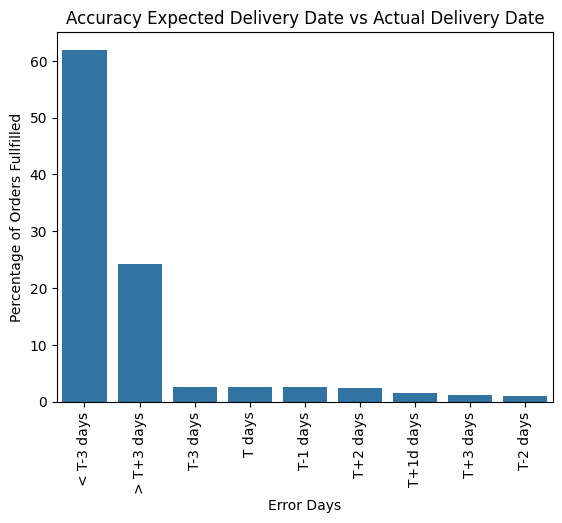

In [169]:
sns.barplot(data = error_days_percentage, x="Error_Days", y = "Count")
plt.xticks(rotation=90)

# Customize the plot
plt.title('Accuracy Expected Delivery Date vs Actual Delivery Date')
plt.xlabel('Error Days')
plt.ylabel('Percentage of Orders Fullfilled')
plt.show()

## Binning the error days wrt to updated delivery date into T+-0, T+-1, T+-2, T+-3 and Other Categories

In [170]:
System_accuracy_updated_cat = train_data_df["System_updated_accuracy"].apply(error_day_cat_calc)

In [171]:
train_data_df[train_data_df["System_updated_accuracy"].apply(int) == 0].shape 

(55398, 25)

In [172]:
System_accuracy_updated_cat.value_counts() / train_data_df.shape[0] * 100

System_updated_accuracy
I    36.323752
A    15.680380
C    14.389391
D    11.995075
F     7.331550
H     6.271246
B     5.190280
E     1.475537
G     1.342787
Name: count, dtype: float64

In [173]:
updated_error_days_series = System_accuracy_updated_cat.apply(lambda x: error_days_mapping[x])

In [174]:
error_days_updated_percentage = updated_error_days_series.value_counts() / train_data_df.shape[0] * 100

In [175]:
error_days_updated_percentage = error_days_updated_percentage.reset_index()

In [176]:
error_days_updated_percentage.columns = ["Error_Days", "Count"]

In [177]:
error_days_updated_percentage

,Error_Days,Count
0,> T+3 days,36.323752
1,T days,15.680380
2,T+1d days,14.389391
3,T-2 days,11.995075
4,T+3 days,7.331550
5,< T-3 days,6.271246
6,T-1 days,5.190280
7,T+2 days,1.475537
8,T-3 days,1.342787


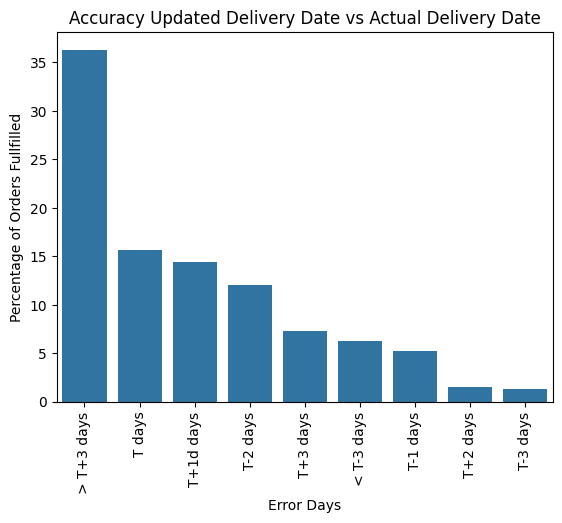

In [178]:
sns.barplot(data = error_days_updated_percentage, x="Error_Days", y = "Count")
plt.xticks(rotation=90)

# Customize the plot
plt.title('Accuracy Updated Delivery Date vs Actual Delivery Date')
plt.xlabel('Error Days')
plt.ylabel('Percentage of Orders Fullfilled')
plt.show()

## Update Delivery Date is same as Acutal Delivery Date for 14.7% of the total orders and Expected Delivery Date is same as 2.5% of the total orders

## Ship Time Analysis

In [179]:
train_data_df.columns

Index(['Quote', 'Segment', 'Order_Dt', 'Brand', 'Product', 'Ship_City',
       'Ship_state', 'Paym_term', 'sku_lead_tm', 'Qty', 'order_amt',
       'deliver_dt', 'prvlg_ship_mode', 'prvlg_build_fac', 'prvlg_ship_fac',
       'prvlg_in_prod_dt', 'prvlg_ship_dt', 'prvlg_expected_delivery_dt',
       'prvlg_updated_delivery_dt', 'diff_in_order_amt_and_quote',
       'Ship_lead_tm', 'ATA', 'Delay', 'System_updated_accuracy',
       'System_accuracy'],
      dtype='object')

In [180]:
train_data_df["Ship_tm"] = (train_data_df["deliver_dt"] - train_data_df["prvlg_ship_dt"]).dt.days

In [181]:
train_data_df["Ship_tm"].describe()

count    353220.000000
mean          5.138828
std           5.251373
min        -213.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          89.000000
Name: Ship_tm, dtype: float64

In [182]:
train_data_df[train_data_df["Ship_tm"] < 0].shape[0] / train_data_df.shape[0] * 100

0.44495393368148434

## 0.4 % of the orders have Ship Time less than 0, hence dropping those observations

In [183]:
train_data_df = train_data_df[train_data_df["Ship_tm"] >= 0].reset_index(drop=True)

In [184]:
train_data_df.shape

(351648, 26)

In [185]:
train_data_df["Delay"].describe()

count    351648.000000
mean         -7.830947
std          25.232306
min        -118.000000
25%         -20.000000
50%          -9.000000
75%           0.000000
max        4131.000000
Name: Delay, dtype: float64

In [186]:
train_data_df[train_data_df["Delay"] < 0].shape[0] / train_data_df.shape[0] * 100

71.3582901082901

## 71.35% of the total oders have the updated date less than the expected date i.e. the delivery date was been advanced for the orders

## Segment and Payment Term Analysis

In [187]:
train_data_df.shape

(351648, 26)

In [188]:
train_data_df.dtypes

Quote                                 float64
Segment                                object
Order_Dt                       datetime64[ns]
Brand                                   int64
Product                                 int64
Ship_City                               int64
Ship_state                              int64
Paym_term                              object
sku_lead_tm                           float64
Qty                                     int64
order_amt                             float64
deliver_dt                     datetime64[ns]
prvlg_ship_mode                         int64
prvlg_build_fac                         int64
prvlg_ship_fac                          int64
prvlg_in_prod_dt               datetime64[ns]
prvlg_ship_dt                  datetime64[ns]
prvlg_expected_delivery_dt     datetime64[ns]
prvlg_updated_delivery_dt      datetime64[ns]
diff_in_order_amt_and_quote           float64
Ship_lead_tm                          float64
ATA                               

In [189]:
train_data_df.isna().sum()

Quote                          50283
Segment                            0
Order_Dt                           0
Brand                              0
Product                            0
Ship_City                          0
Ship_state                         0
Paym_term                          0
sku_lead_tm                    17170
Qty                                0
order_amt                          0
deliver_dt                         0
prvlg_ship_mode                    0
prvlg_build_fac                    0
prvlg_ship_fac                     0
prvlg_in_prod_dt                  11
prvlg_ship_dt                      0
prvlg_expected_delivery_dt         0
prvlg_updated_delivery_dt          0
diff_in_order_amt_and_quote    50283
Ship_lead_tm                      11
ATA                                0
Delay                              0
System_updated_accuracy            0
System_accuracy                    0
Ship_tm                            0
dtype: int64

In [190]:
train_data_df["Segment"].nunique()

20

In [191]:
train_data_df["Segment"].value_counts() / train_data_df.shape[0] * 100

Segment
c3976246348c686e4deca0a7e331a039    32.934924
62ec0553902c09a0651064e81375217d    16.029666
d7ef4d1d66d2ae83faa9aa6383a6f65e    11.710859
d8856a306e76cdec5c33ddb4195c185d     7.899092
436f49abaa9ead4944c0757c875ad7bd     6.932501
79238f4ec268203867a0d6847b3c2846     6.743391
a4208583167ef20b778a2d29a13c11c3     4.779495
faf5ba2f1b7d5118474e600e23a8740b     2.765834
1fbba56b742b0e0b652bb11bc56e71bb     2.745075
d7aab7da9aa8282da8108fbb1e8a8dff     2.020486
4f8f76dfe9030964584b50fefc1d3edb     1.489842
38d88f729574954acf9ce56f97cc50fd     1.298458
d4d4102d1671f635c274ea64ee263571     1.084323
2089cf8b6194305d2c0df02faa5a1360     1.029154
ab2baa560815f58c2d9b6f41063c7e9c     0.466660
c9df4a0502e88a2ad37d308e50791331     0.030428
43ea3ecaf7e8befaee10e6b6f9c54caf     0.017916
ddbb933bd08d204995a0b6d3cc14386b     0.017347
e9e79f285f957213396340936dfb0df7     0.003128
99b54653f9909ef5d81a131f8636e41d     0.001422
Name: count, dtype: float64

## The topmost segment forms 32.9% of the total orders

In [192]:
le_segment = LabelEncoder()
train_data_df["Segment"] = le_segment.fit_transform(train_data_df["Segment"])

In [193]:
train_data_df["Segment"].head()

0    11
1    16
2    11
3     6
4     7
Name: Segment, dtype: int64

In [194]:
train_data_df["Paym_term"].nunique()

51

In [195]:
segment_quantity_data = train_data_df.groupby("Segment")["Qty"].agg(["sum", "size"]).reset_index()

In [196]:
segment_quantity_data

,Segment,sum,size
0,0,105178,9653
1,1,24469,3619
2,2,33396,4566
3,3,76414,24378
4,4,107,63
5,5,33299,5239
6,6,479950,56368
7,7,124059,23713
8,8,7,5
9,9,294939,16807


In [197]:
segment_quantity_data["Segment"] = le_segment.inverse_transform(segment_quantity_data["Segment"])

In [198]:
segment_quantity_data.columns = ["Segment", "Qty", "Orders"]

In [199]:
segment_quantity_data["Qty"] = segment_quantity_data["Qty"] / segment_quantity_data["Qty"].sum() * 100

In [200]:
segment_quantity_data["Orders"] = segment_quantity_data["Orders"] / segment_quantity_data["Orders"].sum() * 100

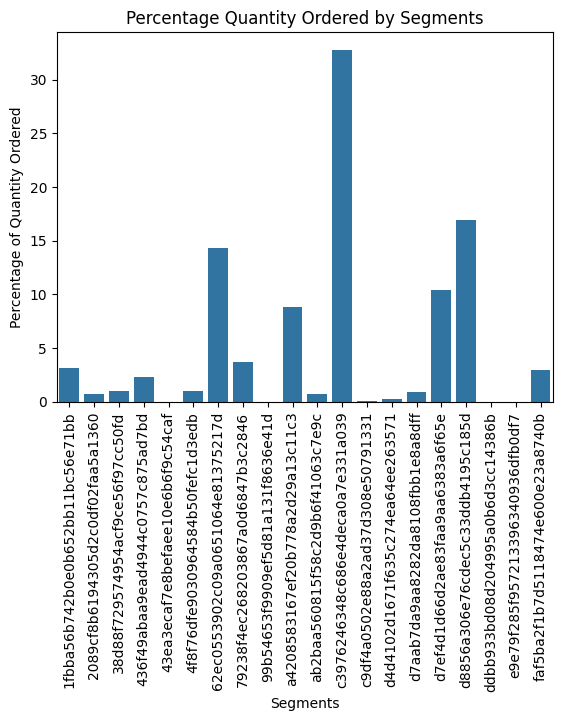

In [201]:
sns.barplot(data = segment_quantity_data, x="Segment", y = "Qty")
plt.xticks(rotation=90)

# Customize the plot
plt.title('Percentage Quantity Ordered by Segments')
plt.xlabel('Segments')
plt.ylabel('Percentage of Quantity Ordered')
plt.show()

In [202]:
import plotly.graph_objects as go

In [203]:
fig = go.Figure()


fig.add_trace(go.Bar(
    x=segment_quantity_data["Segment"],
    y=segment_quantity_data["Qty"],
    name='Qunatity Ordered Percentage'
))


fig.add_trace(go.Bar(
    x=segment_quantity_data["Segment"],
    y=segment_quantity_data["Orders"],
    name='Order Percentage'
))


fig.update_layout(barmode='group',
    title='Segment vs Ouantity vs Orders',
    xaxis_title='Segments',
    yaxis_title='Percentage',
    width=800,
    height=600,
    title_x=0.5, title_y=0.9
)

fig.show()

## Feature Engineering for Order Date and Difference in Order Amount and Quote

In [204]:
train_data_df["Order_Dt_Month"] = train_data_df["Order_Dt"].dt.month

In [205]:
train_data_df["Order_Dt_Week_Day"] = train_data_df["Order_Dt"].dt.day_of_week

In [206]:
train_data_df["Order_Dt_Year_Day"] = train_data_df["Order_Dt"].dt.day_of_year

In [207]:
train_data_df[["Order_Dt_Month", "Order_Dt_Week_Day", "Order_Dt_Year_Day"]]

,Order_Dt_Month,Order_Dt_Week_Day,Order_Dt_Year_Day
0,3,6,83
1,10,4,285
2,2,5,54
3,2,1,36
4,1,1,8
...,...,...,...
351643,12,5,342
351644,3,1,85
351645,12,6,364
351646,4,1,92


## Filling Null Values for Difference in Quote and Order amt with 0 because since the Quoted Amount is 0 it can be considered that the customer is statisfied with the Order Amount

In [208]:
train_data_df["diff_in_order_amt_and_quote"].fillna(0, inplace=True)

/var/folders/kj/lxfx5ktx5fzdl5w_3ty2z5m00000gn/T/ipykernel_34821/3528077737.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [209]:
train_data_df.isna().sum()

Quote                          50283
Segment                            0
Order_Dt                           0
Brand                              0
Product                            0
Ship_City                          0
Ship_state                         0
Paym_term                          0
sku_lead_tm                    17170
Qty                                0
order_amt                          0
deliver_dt                         0
prvlg_ship_mode                    0
prvlg_build_fac                    0
prvlg_ship_fac                     0
prvlg_in_prod_dt                  11
prvlg_ship_dt                      0
prvlg_expected_delivery_dt         0
prvlg_updated_delivery_dt          0
diff_in_order_amt_and_quote        0
Ship_lead_tm                      11
ATA                                0
Delay                              0
System_updated_accuracy            0
System_accuracy                    0
Ship_tm                            0
Order_Dt_Month                     0
O

In [210]:
train_data_df = train_data_df[train_data_df["Ship_tm"] >= 0].reset_index(drop=True)

In [211]:
train_data_df.shape

(351648, 29)

In [212]:
train_data_df["Delay"].describe()

count    351648.000000
mean         -7.830947
std          25.232306
min        -118.000000
25%         -20.000000
50%          -9.000000
75%           0.000000
max        4131.000000
Name: Delay, dtype: float64

In [213]:
train_data_df[train_data_df["Delay"] < 0].shape[0] / train_data_df.shape[0] * 100

71.3582901082901

In [214]:
train_data_df.shape

(351648, 29)

In [215]:
train_data_df.dtypes

Quote                                 float64
Segment                                 int64
Order_Dt                       datetime64[ns]
Brand                                   int64
Product                                 int64
Ship_City                               int64
Ship_state                              int64
Paym_term                              object
sku_lead_tm                           float64
Qty                                     int64
order_amt                             float64
deliver_dt                     datetime64[ns]
prvlg_ship_mode                         int64
prvlg_build_fac                         int64
prvlg_ship_fac                          int64
prvlg_in_prod_dt               datetime64[ns]
prvlg_ship_dt                  datetime64[ns]
prvlg_expected_delivery_dt     datetime64[ns]
prvlg_updated_delivery_dt      datetime64[ns]
diff_in_order_amt_and_quote           float64
Ship_lead_tm                          float64
ATA                               

In [216]:
train_data_df.isna().sum()

Quote                          50283
Segment                            0
Order_Dt                           0
Brand                              0
Product                            0
Ship_City                          0
Ship_state                         0
Paym_term                          0
sku_lead_tm                    17170
Qty                                0
order_amt                          0
deliver_dt                         0
prvlg_ship_mode                    0
prvlg_build_fac                    0
prvlg_ship_fac                     0
prvlg_in_prod_dt                  11
prvlg_ship_dt                      0
prvlg_expected_delivery_dt         0
prvlg_updated_delivery_dt          0
diff_in_order_amt_and_quote        0
Ship_lead_tm                      11
ATA                                0
Delay                              0
System_updated_accuracy            0
System_accuracy                    0
Ship_tm                            0
Order_Dt_Month                     0
O

In [217]:
train_data_df["Segment"].nunique()

20

In [218]:
train_data_df["Segment"].value_counts() / train_data_df.shape[0] * 100

Segment
11    32.934924
6     16.029666
15    11.710859
16     7.899092
3      6.932501
7      6.743391
9      4.779495
19     2.765834
0      2.745075
14     2.020486
5      1.489842
2      1.298458
13     1.084323
1      1.029154
10     0.466660
12     0.030428
4      0.017916
17     0.017347
18     0.003128
8      0.001422
Name: count, dtype: float64

In [219]:
train_data_df["Paym_term"].nunique()

51

In [220]:
train_data_df["Paym_term"].value_counts() / train_data_df.shape[0] * 100

Paym_term
3da37128be279acdc5f6843977bdaec6    35.067169
240d30bc731e89ee278c0f3a833729a8    13.326395
1a896e954ad82fbca063f82e3a2fad46    13.314451
19c7bb068de1fdffcb13cd2691e6088a    10.095323
652f6b0c37563fb728f0560faac1c036     9.588566
c46b25b7686702d6ecf8976a1554c3be     3.705694
aceb0e7297d4bd8f4a1f0a8cbd2be3d9     3.470516
d8a59d80d75cf1b12aee081ce38cba3b     2.328465
952876d39a15a424aa73aa827b096c38     2.022761
c43a6c246a750e6107ee9946b39d697c     1.909011
a1baba0be5f47bc25a755e94fce06808     1.360167
e490ab87fcf0fb202e1ae97800ecfed0     1.231345
f8c126deaa75ba4b1863daf34cf46381     0.582685
f2e2318434e76710c5b45cb8173d9aad     0.236316
847a7e1872cacb88c265e35bb46b705a     0.205603
040b99d786f0158ad9eb6d02f7a80ea1     0.201053
0084a968aa82a0655611468ada7ba98e     0.198778
eee199c675f4880c1716ad2c67c95957     0.178588
03edb88d105ade5f6ad7933d9203696c     0.147022
c9047b211bc7a3bbc9902c90dfd9a5db     0.110053
61d9643ef45d6f96f7df2f1a65c03164     0.108631
772952ef905104200368bd9c

## The topmost Payment Term fulfills 35.2% of the orders

In [221]:
le_payment_term = LabelEncoder()
train_data_df["Paym_term"] = le_payment_term.fit_transform(train_data_df["Paym_term"])

In [222]:
len(le_payment_term.classes_)

51

In [223]:
len(le_segment.classes_)

20

In [224]:
train_data_df.dtypes

Quote                                 float64
Segment                                 int64
Order_Dt                       datetime64[ns]
Brand                                   int64
Product                                 int64
Ship_City                               int64
Ship_state                              int64
Paym_term                               int64
sku_lead_tm                           float64
Qty                                     int64
order_amt                             float64
deliver_dt                     datetime64[ns]
prvlg_ship_mode                         int64
prvlg_build_fac                         int64
prvlg_ship_fac                          int64
prvlg_in_prod_dt               datetime64[ns]
prvlg_ship_dt                  datetime64[ns]
prvlg_expected_delivery_dt     datetime64[ns]
prvlg_updated_delivery_dt      datetime64[ns]
diff_in_order_amt_and_quote           float64
Ship_lead_tm                          float64
ATA                               

In [225]:
train_data_df["Order_Dt_Month"] = train_data_df["Order_Dt"].dt.month

In [226]:
train_data_df["Order_Dt_Week_Day"] = train_data_df["Order_Dt"].dt.day_of_week

In [227]:
train_data_df["Order_Dt_Year_Day"] = train_data_df["Order_Dt"].dt.day_of_year

In [228]:
train_data_df[["Order_Dt_Month", "Order_Dt_Week_Day", "Order_Dt_Year_Day"]]

,Order_Dt_Month,Order_Dt_Week_Day,Order_Dt_Year_Day
0,3,6,83
1,10,4,285
2,2,5,54
3,2,1,36
4,1,1,8
...,...,...,...
351643,12,5,342
351644,3,1,85
351645,12,6,364
351646,4,1,92


In [229]:
system_updated_accuracy_paym_term =  train_data_df.groupby("Paym_term")["System_updated_accuracy"].value_counts().reset_index()

In [230]:
system_updated_accuracy_paym_term

,Paym_term,System_updated_accuracy,count
0,0,2,119
1,0,1,115
2,0,3,112
3,0,6,105
4,0,5,76
...,...,...,...
2691,50,76,1
2692,50,82,1
2693,50,95,1
2694,50,107,1


In [231]:
system_updated_accuracy_paym_term["System_updated_accuracy"] = system_updated_accuracy_paym_term["System_updated_accuracy"].apply(error_day_cat_calc)

In [232]:
system_updated_accuracy_paym_term["Paym_term"] = le_payment_term.inverse_transform(system_updated_accuracy_paym_term["Paym_term"])

In [233]:
system_updated_accuracy_paym_term

,Paym_term,System_updated_accuracy,count
0,0084a968aa82a0655611468ada7ba98e,D,119
1,0084a968aa82a0655611468ada7ba98e,C,115
2,0084a968aa82a0655611468ada7ba98e,F,112
3,0084a968aa82a0655611468ada7ba98e,I,105
4,0084a968aa82a0655611468ada7ba98e,I,76
...,...,...,...
2691,f8c126deaa75ba4b1863daf34cf46381,I,1
2692,f8c126deaa75ba4b1863daf34cf46381,I,1
2693,f8c126deaa75ba4b1863daf34cf46381,I,1
2694,f8c126deaa75ba4b1863daf34cf46381,I,1


In [234]:
system_updated_accuracy_paym_term["System_updated_accuracy"] = system_updated_accuracy_paym_term["System_updated_accuracy"].apply(lambda x: error_days_mapping[x])

In [235]:
system_updated_accuracy_paym_term["count"] = system_updated_accuracy_paym_term["count"] / system_updated_accuracy_paym_term["count"].sum() * 100

In [236]:
system_updated_accuracy_paym_term

,Paym_term,System_updated_accuracy,count
0,0084a968aa82a0655611468ada7ba98e,T-2 days,0.033841
1,0084a968aa82a0655611468ada7ba98e,T+1d days,0.032703
2,0084a968aa82a0655611468ada7ba98e,T+3 days,0.031850
3,0084a968aa82a0655611468ada7ba98e,> T+3 days,0.029859
4,0084a968aa82a0655611468ada7ba98e,> T+3 days,0.021613
...,...,...,...
2691,f8c126deaa75ba4b1863daf34cf46381,> T+3 days,0.000284
2692,f8c126deaa75ba4b1863daf34cf46381,> T+3 days,0.000284
2693,f8c126deaa75ba4b1863daf34cf46381,> T+3 days,0.000284
2694,f8c126deaa75ba4b1863daf34cf46381,> T+3 days,0.000284


In [237]:
system_updated_accuracy_paym_term.rename(columns={"System_updated_accuracy": "Error Days"}, inplace=True)

In [238]:
fig = px.bar(system_updated_accuracy_paym_term, x='Paym_term', y='count', color='Error Days')

# Rotate x-axis tick labels by 90 degrees
fig.update_layout(xaxis_tickangle=-90)

# Customize the plot
fig.update_layout(title='Percentage of Orders Fullfilled by different Payment Terms', title_x=0.5, title_y=0.9)
fig.update_xaxes(title='Payment Terms')
fig.update_yaxes(title='Percentage of orders fullfilled')
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

/Users/priyanshutuli/Desktop/Dell_Usecase/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Cleaned Train Data Shape and Columns are 3515648 Observations and 29 Columns respectively

In [239]:
train_data_df.shape

(351648, 29)

In [240]:
train_data_df.to_csv("./cleaned_training_data.csv", index=False)

## Imputing Negative SKU Lead Time with 0

In [241]:
train_data_df.loc[train_data_df['sku_lead_tm'] < 0, "sku_lead_tm"] = 0

## Removing the Label Encoding from Train Data

In [242]:
unhashed_train_data_df = train_data_df.copy()

In [243]:
unhashed_train_data_df['Segment'] = le_segment.inverse_transform(unhashed_train_data_df["Segment"])

In [244]:
unhashed_train_data_df["Brand"] = le_brand.inverse_transform(unhashed_train_data_df["Brand"])

In [245]:
unhashed_train_data_df["Ship_City"] = le_ship_city.inverse_transform(unhashed_train_data_df["Ship_City"])

In [246]:
unhashed_train_data_df["Ship_state"] = le_ship_state.inverse_transform(unhashed_train_data_df['Ship_state'])

In [247]:
unhashed_train_data_df["Paym_term"] = le_payment_term.inverse_transform(unhashed_train_data_df["Paym_term"])

In [248]:
unhashed_train_data_df["prvlg_ship_mode"] = le_ship_mode.inverse_transform(unhashed_train_data_df["prvlg_ship_mode"])

In [249]:
unhashed_train_data_df["prvlg_ship_fac"] = le_prvlg_build_ship_fac.inverse_transform(unhashed_train_data_df["prvlg_ship_fac"])

In [250]:
unhashed_train_data_df["prvlg_build_fac"] = le_prvlg_build_ship_fac.inverse_transform(unhashed_train_data_df["prvlg_build_fac"])

In [251]:
unhashed_train_data_df["Product"] = le_product.inverse_transform(unhashed_train_data_df["Product"])

In [252]:
unhashed_train_data_df.head()

,Quote,Segment,Order_Dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,...,diff_in_order_amt_and_quote,Ship_lead_tm,ATA,Delay,System_updated_accuracy,System_accuracy,Ship_tm,Order_Dt_Month,Order_Dt_Week_Day,Order_Dt_Year_Day
0,NaN,c3976246348c686e4deca0a7e331a039,2019-03-24,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,62eb42063b4c63d18f476e5c92eafa50,2384e716112fd9418cbb48957c45bfc5,652f6b0c37563fb728f0560faac1c036,30.0,10,...,0.000000e+00,5.0,26,-33,10,-23,10.0,3,6,83
1,1.017820e+12,d8856a306e76cdec5c33ddb4195c185d,2018-10-12,f7127745295f48bdf8fe7a38516d6d41,8fefe421a574b35a71a59d7334dc9d77,ecfc435e2f1b34807f368797625785a6,40871108ac50c36ac78ef67273d247e8,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,5.0,1,...,-1.017820e+12,6.0,10,-14,1,-13,1.0,10,4,285
2,3.000090e+12,c3976246348c686e4deca0a7e331a039,2019-02-23,7d2d85b3d683840d2b6ca6eb2ca1ba0c,2ce9e0196a21cf2045c0bec59f692a5f,e0975410aeac093508e12d41f3a2bd44,2384e716112fd9418cbb48957c45bfc5,3da37128be279acdc5f6843977bdaec6,30.0,2,...,-3.000090e+12,4.0,33,-16,-1,-17,3.0,2,5,54
3,1.029690e+12,62ec0553902c09a0651064e81375217d,2019-02-05,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,8de35dfb7f96b0c4228dd9bfe4abf7aa,2384e716112fd9418cbb48957c45bfc5,19c7bb068de1fdffcb13cd2691e6088a,30.0,1,...,-1.029690e+12,13.0,24,-29,4,-25,4.0,2,1,36
4,3.000080e+12,79238f4ec268203867a0d6847b3c2846,2019-01-08,68648ccd3ba6a5cb996019622a58c56e,5400e26de9b23978b8907afdcd0bcb97,b956dc64ac02f753e7549bbc660c74de,89bc8c0c87b49d3bb6f8fdb4b9bae4b0,3da37128be279acdc5f6843977bdaec6,46.0,2,...,-3.000080e+12,9.0,108,28,6,34,8.0,1,1,8


In [253]:
unhashed_train_data_df.dtypes

Quote                                 float64
Segment                                object
Order_Dt                       datetime64[ns]
Brand                                  object
Product                                object
Ship_City                              object
Ship_state                             object
Paym_term                              object
sku_lead_tm                           float64
Qty                                     int64
order_amt                             float64
deliver_dt                     datetime64[ns]
prvlg_ship_mode                        object
prvlg_build_fac                        object
prvlg_ship_fac                         object
prvlg_in_prod_dt               datetime64[ns]
prvlg_ship_dt                  datetime64[ns]
prvlg_expected_delivery_dt     datetime64[ns]
prvlg_updated_delivery_dt      datetime64[ns]
diff_in_order_amt_and_quote           float64
Ship_lead_tm                          float64
ATA                               

In [254]:
unhashed_train_data_df["ID"] = unhashed_train_data_df.index

In [255]:
unhashed_train_data_df.head()

,Quote,Segment,Order_Dt,Brand,Product,Ship_City,Ship_state,Paym_term,sku_lead_tm,Qty,...,Ship_lead_tm,ATA,Delay,System_updated_accuracy,System_accuracy,Ship_tm,Order_Dt_Month,Order_Dt_Week_Day,Order_Dt_Year_Day,ID
0,NaN,c3976246348c686e4deca0a7e331a039,2019-03-24,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,62eb42063b4c63d18f476e5c92eafa50,2384e716112fd9418cbb48957c45bfc5,652f6b0c37563fb728f0560faac1c036,30.0,10,...,5.0,26,-33,10,-23,10.0,3,6,83,0
1,1.017820e+12,d8856a306e76cdec5c33ddb4195c185d,2018-10-12,f7127745295f48bdf8fe7a38516d6d41,8fefe421a574b35a71a59d7334dc9d77,ecfc435e2f1b34807f368797625785a6,40871108ac50c36ac78ef67273d247e8,aceb0e7297d4bd8f4a1f0a8cbd2be3d9,5.0,1,...,6.0,10,-14,1,-13,1.0,10,4,285,1
2,3.000090e+12,c3976246348c686e4deca0a7e331a039,2019-02-23,7d2d85b3d683840d2b6ca6eb2ca1ba0c,2ce9e0196a21cf2045c0bec59f692a5f,e0975410aeac093508e12d41f3a2bd44,2384e716112fd9418cbb48957c45bfc5,3da37128be279acdc5f6843977bdaec6,30.0,2,...,4.0,33,-16,-1,-17,3.0,2,5,54,2
3,1.029690e+12,62ec0553902c09a0651064e81375217d,2019-02-05,3490c27ed4ba0b67f50caf8e0bcfd80a,0d65e48784a1468da4208435313ade1a,8de35dfb7f96b0c4228dd9bfe4abf7aa,2384e716112fd9418cbb48957c45bfc5,19c7bb068de1fdffcb13cd2691e6088a,30.0,1,...,13.0,24,-29,4,-25,4.0,2,1,36,3
4,3.000080e+12,79238f4ec268203867a0d6847b3c2846,2019-01-08,68648ccd3ba6a5cb996019622a58c56e,5400e26de9b23978b8907afdcd0bcb97,b956dc64ac02f753e7549bbc660c74de,89bc8c0c87b49d3bb6f8fdb4b9bae4b0,3da37128be279acdc5f6843977bdaec6,46.0,2,...,9.0,108,28,6,34,8.0,1,1,8,4


In [256]:
unhashed_train_data_df.to_csv("./cleaned_unencoded_training_data.csv", index=False)